# [MML S2] 09. Linear regression 

### Basic concepts of linear regression 

There are two known values (observed data), input (or predictor variable) x and output (or label) y and our quest is to find a relationship between these two values using regression. 

$$
y = f(x) + \epsilon
$$

f(x) is a function of x and also it equals predicted (estimated) value, $y_{hat}$ as below 

$$
y_{hat} = \alpha x + \beta
$$

$\alpha$ and $\beta$ are parameters. 

To define the relationship between x and y (or $y_{hat}$) well, optimized two paramters, $\alpha$ and $\beta$ with minimized $\bigtriangleup y = y - y_{hat}$, should be found. 

Then it is the main object of the linear regression.

To get started, it is an important process to understand mechanism briefly. 

First, the **Ordinary Least Squares (OLS)**, which estimates $\alpha$ and $\beta$ to minimize the sum of the squared difference between $y$ and $y_{hat}$ is addressed here. 

In detail, check out the blog ABB (


### ☻ Linear regression w/ the OLS method
Consider **random dataset** and find $\alpha$ and $\beta$ using the OLS method. 

In [56]:
##########################
#    call library
##########################
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

##########################
#    Real data generation 
#    : we generate random data 
##########################

np.random.seed(0)

#..... input/predictor 
#      generate 100 data p't w mean of 1.5 and stddev of 2.5
x = 2.5 * np.random.randn(100) + 1.5   
#..... generate residual term 
res = 0.5 * np.random.randn(100)       
#..... output/label (ground truth)
y = 2 + 0.3 * x + res                  

#..... to dataframe
df = pd.DataFrame(
    {'x': x,
     'y': y}
)

 check statistical values
-----------------------------------------
x_mean: 1.6495200388362121
y_mean: 2.5358624970247825


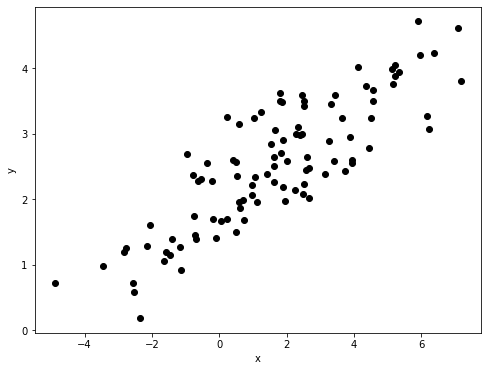

In [40]:
##########################
#    Visualiztion 
##########################
plt.figure(figsize=(8,6))
plt.plot(x,y,'ko')
plt.xlabel('x')
plt.ylabel('y')

print('=========================================')
print(' check statistical values')
print('-----------------------------------------')
print('x_mean:',np.mean(x))
print('y_mean:',np.mean(y))
print('=========================================')

alpha = 0.3229396867092763
beta = 2.0031670124623426


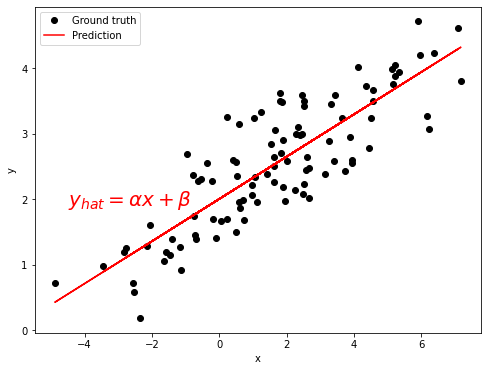

In [41]:
##########################
#    Find alpha, beta by OLS
##########################
#..... calcualte mean 
xmean = np.mean(x)
ymean = np.mean(y)

#..... calucalte alpha (weight) and beta (bias)
df['xycov'] = (df['x'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['x'] - xmean)**2

alpha = df['xycov'].sum() / df['xvar'].sum()
beta = ymean - (alpha * xmean)
print('=========================================')
print(f'alpha = {alpha}')
print(f'beta = {beta}')
print('=========================================')

y_hat = alpha*x + beta

#..... visualization 
plt.figure(figsize=(8,6))
plt.plot(x,y,'ko',label='Ground truth')
plt.plot(x,y_hat,'r-', label='Prediction')
plt.text(-4.5, 1.9,r'$y_{hat}=\alpha x+ \beta$',
         color='red',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### ☻ Linear regression w/ statsmodels
Consider **advertising dataset** 

In [55]:
##########################
#    Load dataset
##########################
advert = pd.read_csv('advertising.csv')
#..... check dataset
print('=========================================')
print('total size : ', advert.shape)
print('-----------------------------------------')
print(advert.describe())
print('=========================================')
print(advert.head())
print('=========================================')

total size :  (200, 4)
-----------------------------------------
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [68]:
##########################
#    model
##########################
import statsmodels.formula.api as smf

#..... Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()

#..... check the paramters
print('=========================================')
print(model.params)
print('=========================================')

Intercept    6.974821
TV           0.055465
dtype: float64


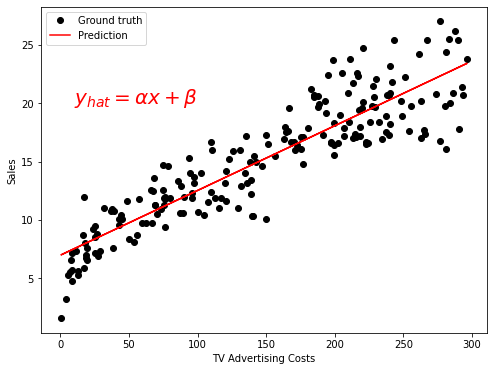

In [71]:
##########################
#    Predict + visualization
##########################
sales_pred = model.predict()

#..... visualization
plt.figure(figsize=(8,6))
plt.plot(advert.TV, advert.Sales, 'ko',label='Ground truth') 
plt.plot(advert.TV, sales_pred, 'r-', label='Prediction')
plt.text(10, 20,r'$y_{hat}=\alpha x+ \beta$',
         color='red',fontsize=20)

plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.legend()

### ☻ Linear regression w/ scikit-learn
Consider **advertising dataset** 

In [60]:
##########################
#    model
##########################
from sklearn.linear_model import LinearRegression

#..... consider multivariable, x1=TV and x2=Radio
predictors = ['TV', 'Radio']
X = advert[predictors]
y = advert['Sales']

#..... Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

#..... check the paramters
print('=========================================')
print(f'alpha = {model.coef_}')
print(f'beta = {model.intercept_}')
print('=========================================')

alpha = [0.05444896 0.10717457]
beta = 4.63087946409777


In [72]:
##########################
#    Predict + visualization
##########################
sales_multipred = model.predict(X)
sales_multipred

0      19.737265
1       9.443004
2       7.928816
3      15.377734
4      17.002852
         ...    
195     9.093576
196    12.199603
197    16.792086
198    22.704630
199    19.848195
Length: 200, dtype: float64